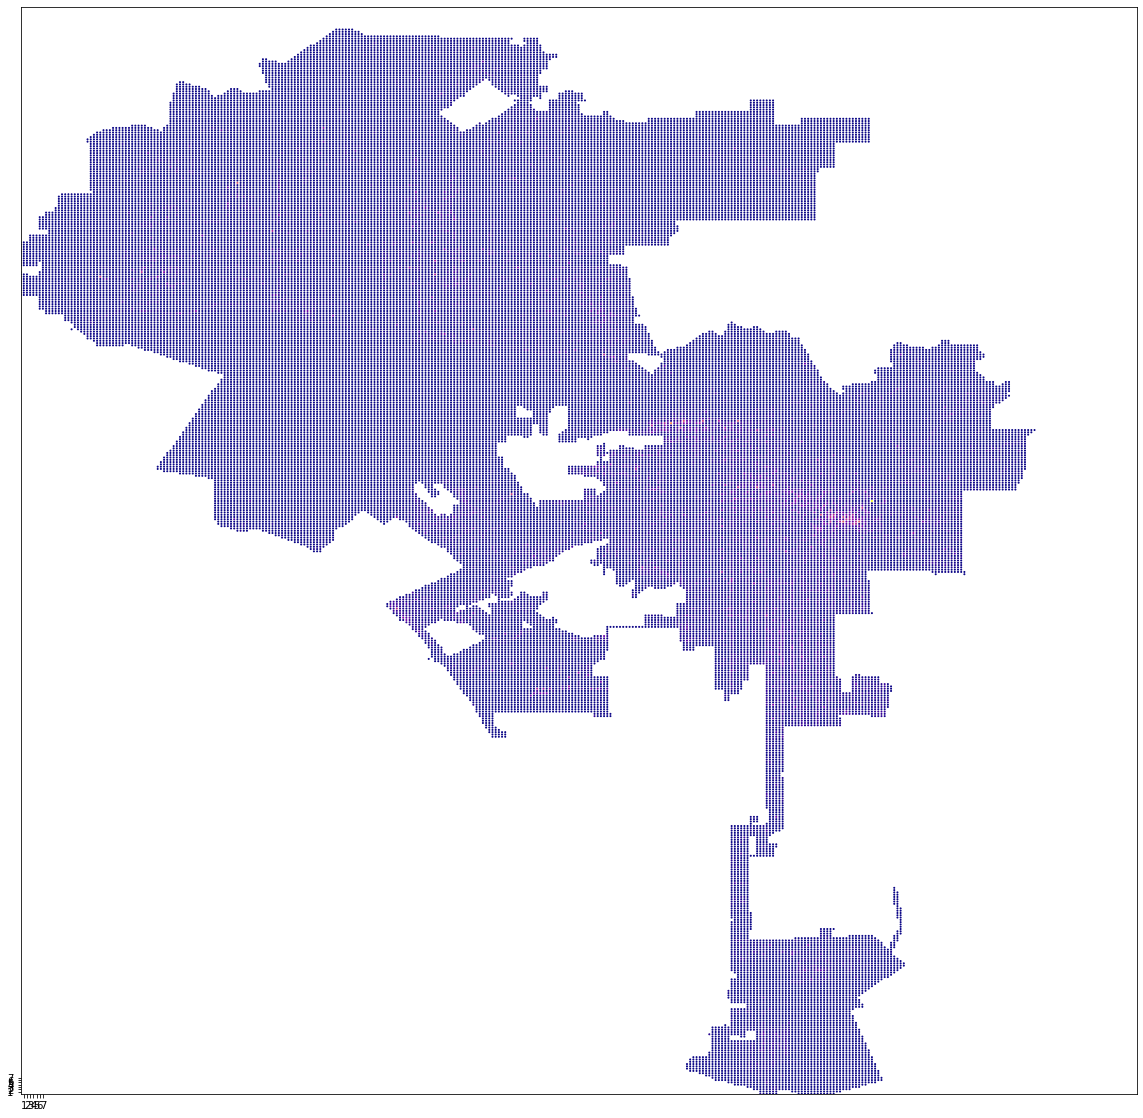

In [1]:
import graph
# import models
import plotter

g = graph.Graph()
g.loadGraph("./out/saved_graph_races.pkl")
# g.loadGraph("./out/saved_graph.pkl")

real_arrest_counts = {ids:len(nodes.pd_reports) for ids, nodes in g.nodes.items()}

plotter.basic_plot(real_arrest_counts)

In [2]:
import random
import patrols
## Run 50 simulations on all of LA
sim_list = []
uniform_arrest_rate = {node:0.35 for node in g.nodes.keys()}

for t in range(10):
    # run 10 trials
    all_nodes = {}

    for pID in range(1,22):
        while(True):
            start = random.choice(list(g.precincts[pID].values()))
            try:
                path, arrests = patrols.random_walk_precinct(45000, g, start, uniform_arrest_rate)
            except:
                continue
            else:
                all_nodes.update(arrests)
                break

    sim_list.append(all_nodes)
    print(f"Trial {t} complete", end="\r")

In [3]:
import stats
mystore = stats.result(sim_list)

In [4]:
print(mystore[(127, 386)])
print(len(mystore))

{'mean': 5.4, 'stddev': 5.94792213951879, 'values': [8, 20, 1, 3, 3, 3, 1, 0, 9, 6]}
55849


In [5]:
print(len(mystore))
print(len(real_arrest_counts))

55849
55849


In [6]:
ans, (c85,c95,c99) = stats.compare_sims(mystore, real_arrest_counts)
print(f"nodes with 85 confidence: {c85} \nnodes with 95 confidence: {c95} \nnodes with 99 confidence: {c99}")

print()

print(stats.compare_means(mystore, real_arrest_counts))
for i in range(10):
    print(f"Mean of sim #{i} is {stats.sim_mean(sim_list[i])}")
print(f"Mean of real arrests is {stats.sim_mean(real_arrest_counts)}")

nodes with 85 confidence: 18444 
nodes with 95 confidence: 18444 
nodes with 99 confidence: 18444

 We are <85% confident that the mean of our simulated data matches the mean of the real world data. 
Mean of sim #0 is 5.931422227792798
Mean of sim #1 is 5.920374581460725
Mean of sim #2 is 5.920034378413221
Mean of sim #3 is 5.912603627638812
Mean of sim #4 is 5.9146448459238306
Mean of sim #5 is 5.926641479704203
Mean of sim #6 is 5.919622553671507
Mean of sim #7 is 5.934233379290587
Mean of sim #8 is 5.934143852172824
Mean of sim #9 is 5.937563788071407
Mean of real arrests is 6.050332145606904


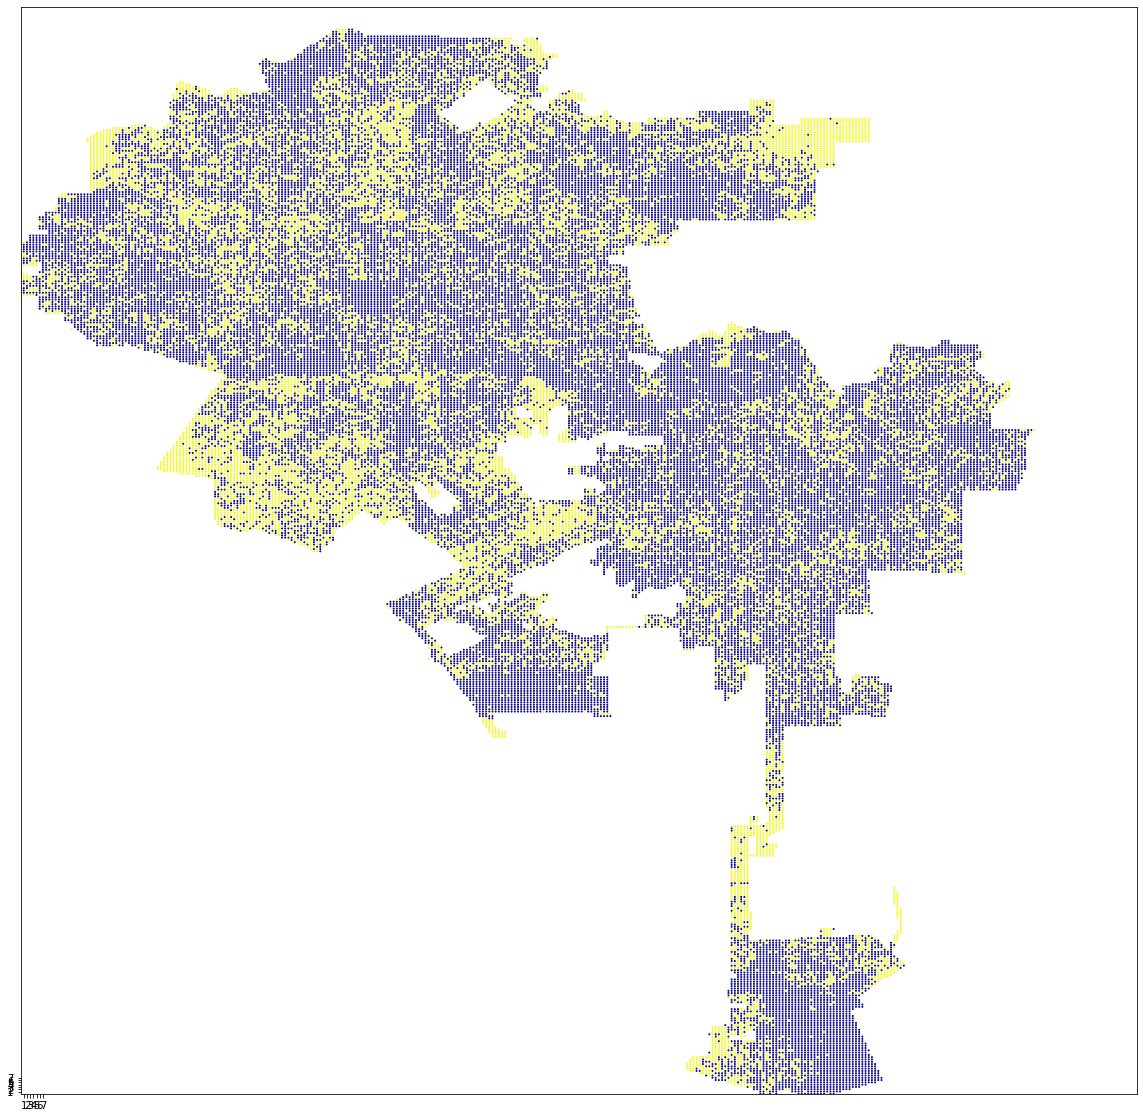

In [7]:
out_nodes = {node_id:(sum(tup)//3) for node_id, tup in ans.items()}

plotter.basic_plot(out_nodes)

In [8]:
print(out_nodes)

{(146, 372): 0, (147, 372): 1, (148, 372): 1, (149, 372): 0, (142, 373): 0, (143, 373): 0, (144, 373): 1, (145, 373): 0, (146, 373): 0, (147, 373): 0, (148, 373): 0, (149, 373): 1, (138, 374): 0, (139, 374): 0, (140, 374): 0, (141, 374): 0, (142, 374): 0, (143, 374): 0, (144, 374): 1, (145, 374): 1, (146, 374): 0, (147, 374): 1, (148, 374): 0, (149, 374): 0, (150, 374): 0, (133, 375): 0, (134, 375): 0, (135, 375): 0, (136, 375): 0, (137, 375): 0, (138, 375): 0, (139, 375): 0, (140, 375): 0, (141, 375): 1, (142, 375): 0, (143, 375): 1, (144, 375): 1, (145, 375): 1, (146, 375): 1, (147, 375): 0, (148, 375): 0, (149, 375): 1, (150, 375): 0, (129, 376): 0, (130, 376): 1, (131, 376): 0, (132, 376): 1, (133, 376): 1, (134, 376): 1, (135, 376): 1, (136, 376): 0, (137, 376): 0, (138, 376): 0, (139, 376): 0, (140, 376): 1, (141, 376): 0, (142, 376): 1, (143, 376): 1, (144, 376): 1, (145, 376): 1, (146, 376): 0, (147, 376): 0, (148, 376): 1, (149, 376): 0, (150, 376): 0, (125, 377): 1, (126, 377

In [9]:
similarity = stats.similarity_score(mystore, real_arrest_counts)
print(similarity)

55849
55849
0.48414090909197693
